In [125]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Часть 1 Построить прогностическую модель для набора данных в файле, проверить связь признаков, построить прогностические модели и модели тренда линейного и квадратичного. Оценить погрешность. 

### 1. Для датасета в excel (номер студенческого билета - 22Б0758, следовательно x=x+8,y=y+5,z=z+7)
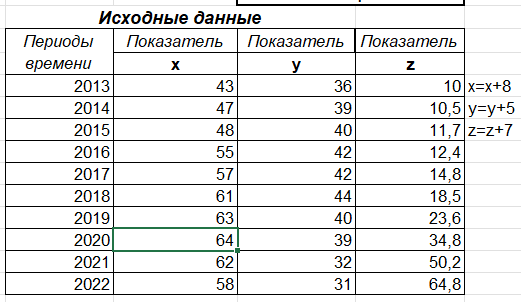

In [126]:
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'x': [43, 47, 48, 55, 57, 61, 63, 64, 62, 58],
    'y': [36, 39, 40, 42, 42, 44, 40, 39, 32, 31],
    'z': [10, 10.5, 11.7, 12.4, 14.8, 18.5, 23.6, 34.8, 50.2, 64.8]
}

df = pd.DataFrame(data)

Для начала проанализируем данные и оценим их взаимосвязь. Для этого построим график

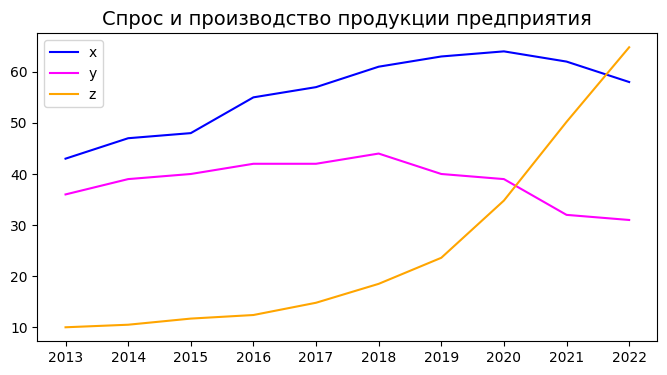

In [127]:
plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['x'], label='x', color='blue')
plt.plot(df['Year'], df['y'], label='y', color='magenta')
plt.plot(df['Year'], df['z'], label='z', color='orange')
plt.xticks(df['Year'])
plt.title("Спрос и производство продукции предприятия", fontsize=14)
plt.legend(loc='upper left', fontsize=10)

plt.show()

График получился примерно такой же, как в экселе: 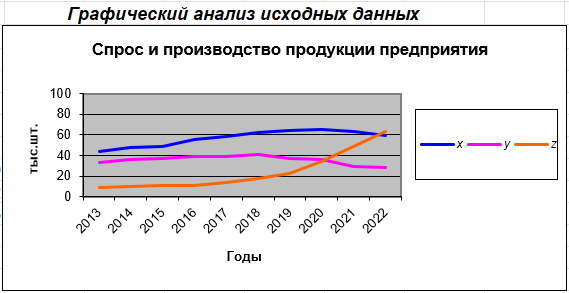

Вывод: Показатель x демонстрирует постепенный рост с 2013 по 2020, после чего происходит небольшой спад. Показатель y также постепенно увеличивался до 2018 года, но с 2019 года начал снижаться. В отличие от них, показатель z показывает значительный и стабильный рост на протяжении всего периода, при этом особенно резко возрастает с 2018 года

После проведенного анализа, можем удалить параметр 'Year' из датасета, чтобы он не мешал дальнейшим вычислениям

In [128]:
df = df.drop('Year', axis=1)

Далее рассмотрим связь признаков с помощью матрицы корреляции. Коэффициент корреляции вычисляется по формуле: 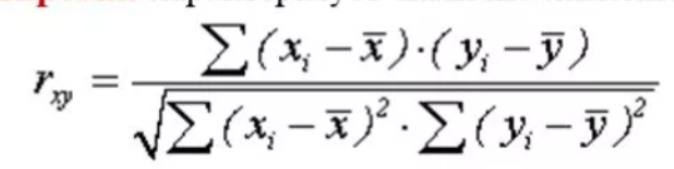

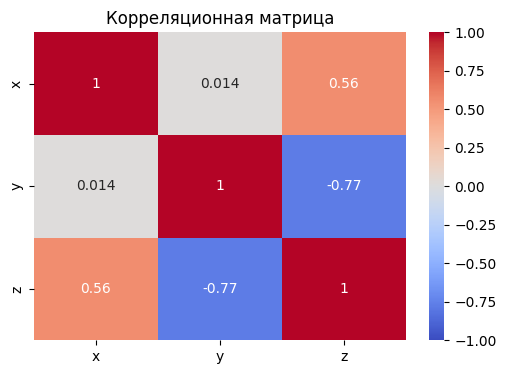

In [129]:
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()

Коэффициент корреляции между x и y составляет 0.01, что указывает на очень слабую связь. Это означает, что показатели x и y слабо связаны, и изменения в x не сильно влияют на y. Коэффициент корреляции между x и z составляет 0.56, что указывает на умеренную положительную корреляцию. Это означает, что при увеличении x значение z также имеет тенденцию к увеличению, хотя это не является строгой зависимостью. Вывод: Корреляция между z и x более сильная, чем между y и x. Следовательно для моделей регрессии будем использовать z

В экселе получился такой же результат: 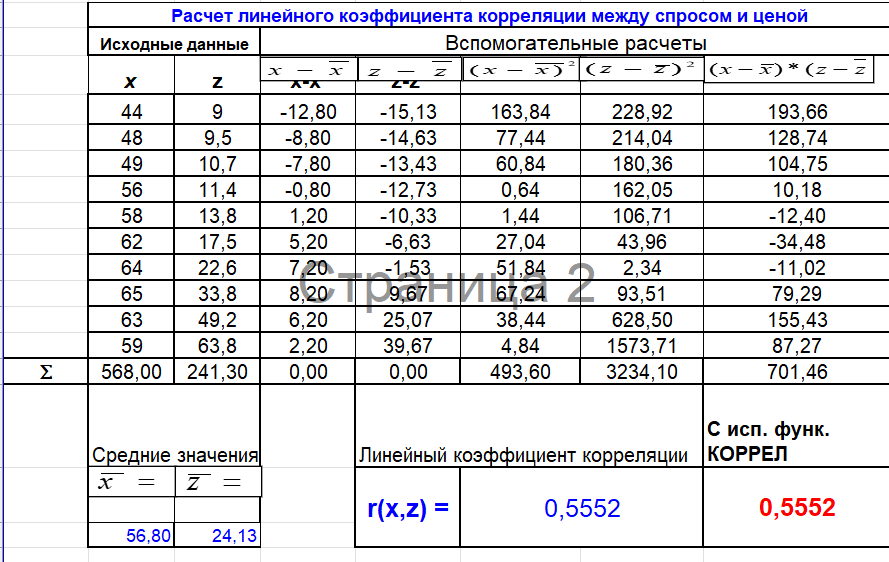 

#### Линейная регрессия 

По заданию: будем рассчитывать параметры регрессии между x и z, так как ранее по матрице корреляции мы сделали вывод, что корреляция между x и z более сильная

In [130]:
from sklearn.model_selection import train_test_split
df = df.drop('y', axis=1)

X = df.drop('x', axis=1)   
y = df['x'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Для расчёта параметров линейной регрессии используется метод наименьших квадратов. Он позволяет получить такие оценки параметров, при которых сумма квадратов отклонений фактических значений результативного признака от теоретических значений минимальна

Параметры уравнения регрессии по МНК оцениваются по формуле: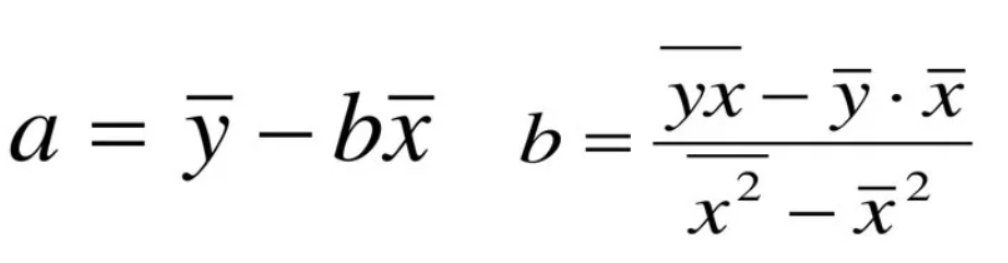

In [131]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
new_df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred}) 
print(new_df.head())

   Actual  Predicted
8      62  60.140187
1      47  55.619033
5      61  56.530097
0      43  55.562091


Для оценки воспользуемся MAE. MAE (Mean Absolute Error) — это метрика, которая измеряет среднюю абсолютную ошибку между фактическими и прогнозируемыми значениями. Она показывает среднее абсолютное отклонение каждого прогноза от соответствующего фактического значения. Чем выше значение MAE, тем больше ошибок в прогнозах модели

MAE находится по формуле: 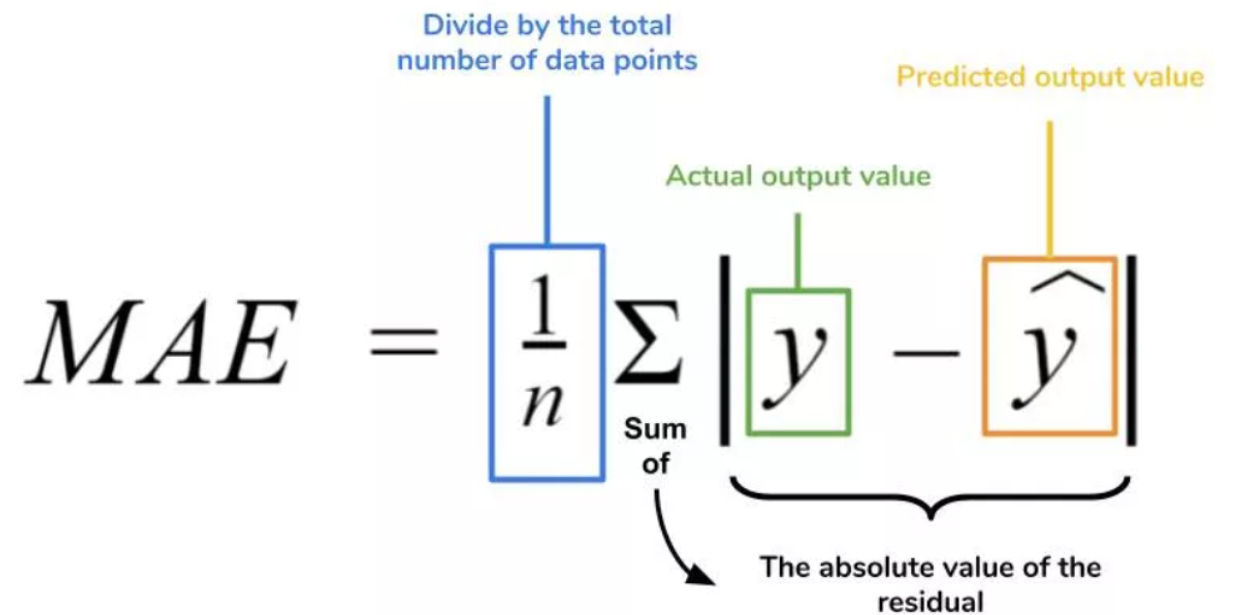

In [132]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

6.877710094668057

В среднем, прогнозируемые значения отклоняются от фактических на 6,88. Сложно сказать, насколько это хороший результат, поэтому восспользуемся другой метрикой

MAPE (Mean Absolute Percentage Error) — это средняя абсолютная процентная ошибка.Она измеряет процентную ошибку прогноза по отношению к фактическим значениям

MAPE находится по формуле: 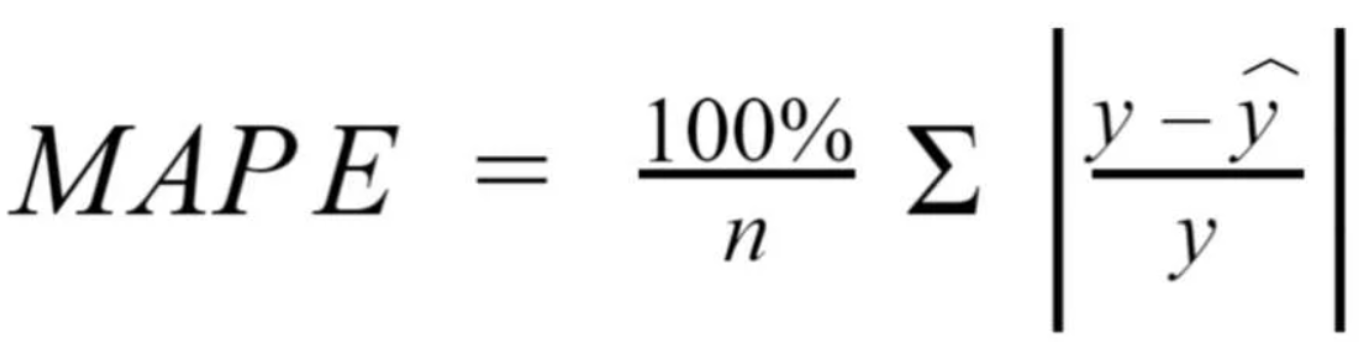

In [133]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape * 100:.2f}%')

MAPE: 14.47%


Ошибка в прогнозах модели составляет примерно 14.47% от фактических значений. В целом, это достаточно неплохой результат, особенно учитывая то, что у нас очень мало данных для обучения и анализа

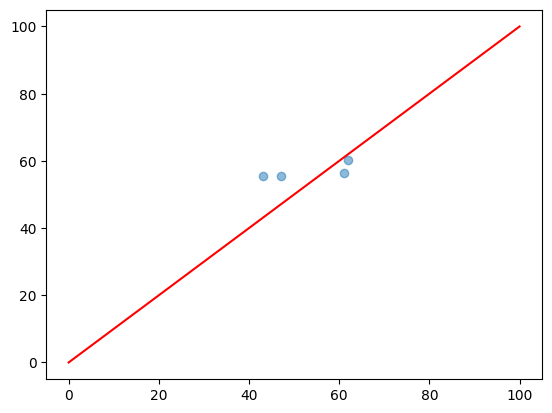

In [134]:
plt.scatter(y_test, y_pred, alpha=0.5)
(plt.plot([0, 100], [0, 100], 'r-'))

Точки на графике представляют собой пары значений: y_test и y_pred. Это показывает, насколько сильно предсказанные значения (y_pred) отклоняются от реальных значений (y_test).
Красная линия представляет собой идеальный случай: если бы предсказанные значения точно соответствовали реальным, все точки должны были бы лежать на этой линии 

#### Квадратичная регрессия 

Создадим полиномиальные признаки на основе исходных данных: для каждого признака (в нашем случае только для z) будут добавлены его квадраты, а также произведения каждого признака на другие признаки. Включается также фиктивная единичная колонка для свободного члена (интерсепт). Это позволяет модели найти и линейные, и нелинейные зависимости в данных. Далее воспользуемся линейной регрессией, которая теперь будет обучаться на полиномиальных признаках

In [135]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

X_test_poly = poly.transform(X_test)
y_pred_poly = model_poly.predict(X_test_poly)

new_df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred_poly}) 
print(new_df.head())

   Actual  Predicted
8      62  65.241618
1      47  51.070221
5      61  57.985400
0      43  50.569991


In [136]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mae_poly

4.474107700465671

In [137]:
mape = mean_absolute_percentage_error(y_test, y_pred_poly)
print(f'MAPE: {mape * 100:.2f}%')

MAPE: 9.11%


Видно, что квадратичная регрессия справилась лучше, чем линейная

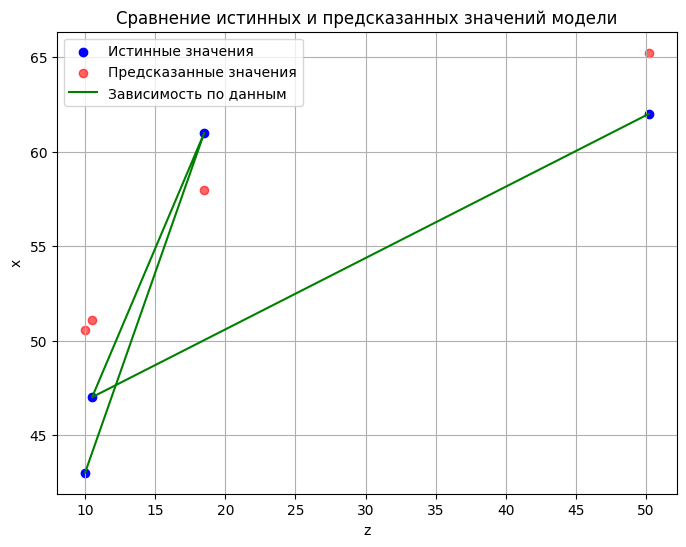

In [138]:
X_test_single_feature = X_test['z'] 

plt.figure(figsize=(8, 6))
plt.scatter(X_test_single_feature, y_test, color='blue', label='Истинные значения')
plt.scatter(X_test_single_feature, y_pred_poly, color='red', label='Предсказанные значения', alpha=0.6)
plt.plot(X_test_single_feature, y_test, color='green', label='Зависимость по данным')
plt.title('Сравнение истинных и предсказанных значений модели')
plt.xlabel('z')
plt.ylabel('x')
plt.legend()
plt.grid(True)
plt.show()


#### Линейная модель тренда

Тренд (Trend): показывает общее направление движения данных временного ряда на протяжении длительного времени. Это может быть восходящий тренд (увеличение значений), нисходящий тренд (уменьшение значений) или отсутствие тренда (значения остаются примерно на одном уровне)

Уравнение линейной модели тренда вычисляется по формуле: 

Где a1 (коэффициент наклона) вычисляется по формуле 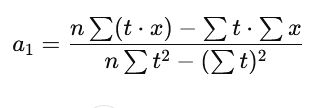

А a0 (свободный член) вычисляется по формуле 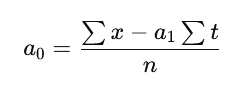 

Параметры линейного тренда: a1 = 2.11, a0 = 44.20
Уравнение линейного тренда: 44.20 + 2.11t


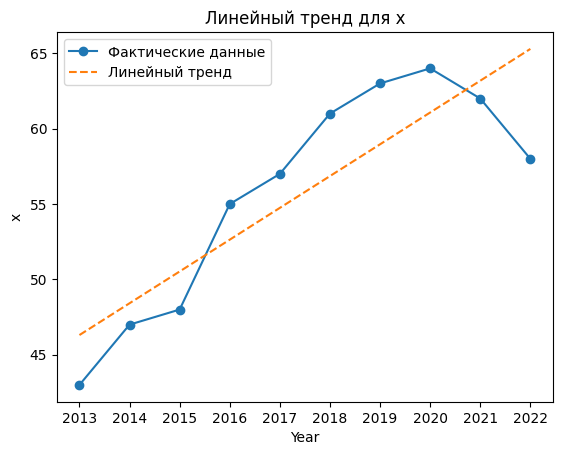

In [139]:
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'x': [43, 47, 48, 55, 57, 61, 63, 64, 62, 58],
    't': np.arange(1, 11)  # Условное обозначение времени t от 1 до 11
}

df_with_t = pd.DataFrame(data)
linear_coeffs = np.polyfit(df_with_t['t'], df_with_t['x'], 1)
a1, a0 = linear_coeffs 
# a1 - это наклон (угловой коэффициент)
# a0 - это свободный член (пересечение с осью)
df_with_t['linear_trend'] = a1 * df_with_t['t'] + a0 
print(f"Параметры линейного тренда: a1 = {a1:.2f}, a0 = {a0:.2f}")
print(f"Уравнение линейного тренда: {a0:.2f} + {a1:.2f}t")

plt.plot(df_with_t['Year'], df_with_t['x'], label='Фактические данные', marker='o')
plt.plot(df_with_t['Year'], df_with_t['linear_trend'], label='Линейный тренд', linestyle='--')
plt.xlabel('Year')
plt.ylabel('x')
plt.xticks(df_with_t['Year'])
plt.legend()
plt.title('Линейный тренд для x')
plt.show()

Видно, что фактические значения далеки от модели линейного тренда. Тем более, к 2022 году данные уменьшаются, и если предположить, что в будущем они продолжат уменьшаться, то данная модель никак под это не подстроится. Это логично, так как данные нелинейны, а значит линейная модель не может корректно подобрать коэффициенты

#### Квадратичная модель тренда

Уравнение линейной модели тренда вычисляется по формуле: 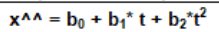

Где коэффициенты b0, b1 и b2 вычисляются с помощью системы уравнений: 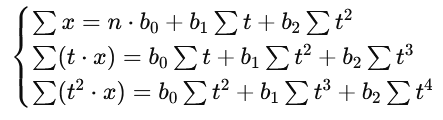

Параметры квадратичного тренда: b0 = -0.43, b1 = 6.86, b2 = 34.70
Уравнение квадратичного тренда: -0.43t^2 + 6.86t + 34.70


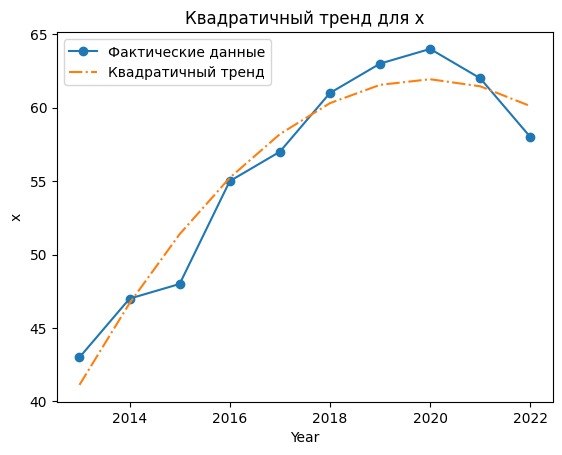

In [140]:
quadratic_coeffs = np.polyfit(df_with_t['t'], df_with_t['x'], 2)
b0, b1, b2 = quadratic_coeffs
# b2 - это свободный член
# b1 - это линейный член
# b0 - Это квадратичный член 

df_with_t['quadratic_trend'] = b0 * df_with_t['t'] ** 2 + b1 * df_with_t['t'] + b2
print(f"Параметры квадратичного тренда: b0 = {b0:.2f}, b1 = {b1:.2f}, b2 = {b2:.2f}")
print(f"Уравнение квадратичного тренда: {b0:.2f}t^2 + {b1:.2f}t + {b2:.2f}")

plt.plot(df_with_t['Year'], df_with_t['x'], label='Фактические данные', marker='o')
plt.plot(df_with_t['Year'], df_with_t['quadratic_trend'], label='Квадратичный тренд', linestyle='-.')
plt.xlabel('Year')
plt.ylabel('x')
plt.legend()
plt.title('Квадратичный тренд для x')
plt.show()

Квадратичная модель тренда получилась намного лучше, чем ленейная, что подтверждает ранние выводы

### 2. Для датасета CarPrice

In [141]:
path = 'CarPrice_Assignment.xls'
carPriceData = pd.read_csv(path, delimiter=',')
carPriceData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Для начала проведем предварительный разведочный анализ набора данных, в ходе которого рассмотрим ключевые характеристеки набора:

In [142]:
carPriceData.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [143]:
carPriceData.shape

(205, 26)

In [144]:
carPriceData.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Нумериальные столбцы

In [145]:
num_cols = carPriceData.select_dtypes(exclude='object')
num_cols.shape

(205, 16)

In [146]:
num_cols.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [147]:
carPriceData['price'].min()

5118.0

Категориальные столбцы

In [148]:
cat_cols = carPriceData.select_dtypes(include="object")
cat_cols.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [149]:
print(carPriceData['doornumber'].unique())
print(carPriceData['cylindernumber'].unique())

['two' 'four']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


Чтобы привести столбцы doornumber и cylindernumber к числовому типу, заменим текстовые значения на числовые

In [150]:
carPriceData['doornumber'] = carPriceData['doornumber'].replace({'two': 2, 'four': 4})
carPriceData['doornumber'] = carPriceData['doornumber'].astype(int)

carPriceData['cylindernumber'] = carPriceData['cylindernumber'].replace({
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
})
carPriceData['cylindernumber'] = carPriceData['cylindernumber'].astype(int)

print(carPriceData['doornumber'].unique())
print(carPriceData['cylindernumber'].unique())

[2 4]
[ 4  6  5  3 12  2  8]


Чтобы избежать потенциальных проблем с интерпретацией нечисловых значений, для остальных столбцов будем использовать get_dummies

In [151]:
columns_to_encode = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']
for c in columns_to_encode:
    dummies = pd.get_dummies(carPriceData[c], drop_first=True)
    carPriceData = pd.concat([carPriceData, dummies], axis=1)
    carPriceData.drop(c, axis=1, inplace=True)
carPriceData = carPriceData.replace({True: 1, False: 0})
carPriceData.head()

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero giulia,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,2,94.5,171.2,65.5,52.4,2823,6,...,0,1,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,1,0,0


In [152]:
print(carPriceData['CarName'].unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

Так как почти все автомобили имеют уникальное название, которое скорее всего не влияет на итоговую цену, предположим, что данный столбец можно удалить без особых потерь для предсказания

In [153]:
carPriceData = carPriceData.drop(columns=['CarName'])
carPriceData

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,0,0,0,1,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,109.1,188.8,68.9,55.5,2952,4,141,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,4,109.1,188.8,68.8,55.5,3049,4,141,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,4,109.1,188.8,68.9,55.5,3012,6,173,...,0,1,0,0,0,0,0,1,0,0
203,204,-1,4,109.1,188.8,68.9,55.5,3217,6,145,...,0,0,0,0,0,1,0,0,0,0


Посмотрим, как разные значения коррелируют с ценой машины

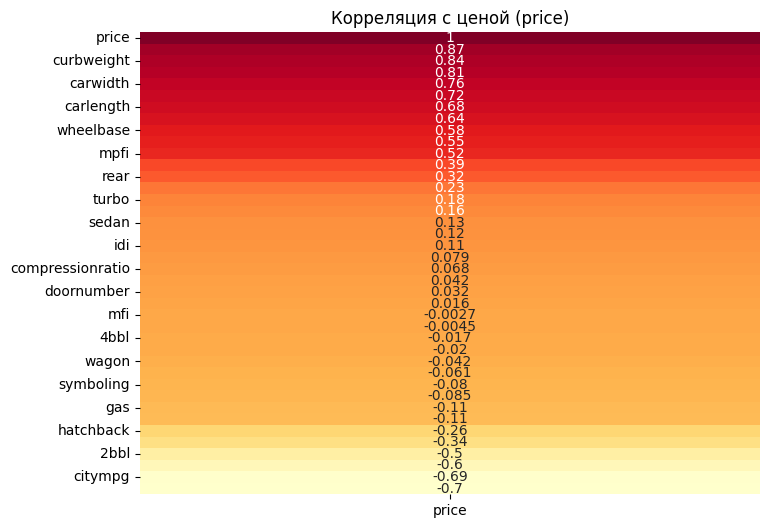

In [154]:
correlations_with_price = carPriceData.corr()['price'].sort_values(ascending=False)
fig = plt.figure(figsize=(8, 6))
sns.heatmap(correlations_with_price.to_frame(), annot=True, cmap='YlOrRd', cbar=False)
plt.title('Корреляция с ценой (price)')
plt.show()

По матрице корреляции можем сделать вывод, что масса, ширина и длина автомобиля имеют очень большую корреляцию с итоговой ценой (больше чем 0,8). Чем они больше, тем выше цена

Расход топлива в городе (citympg) наоборот, имеет отрицательную корреляцию (-0,7). Это логично, так как автомобили с более высоким городским расходом топлива стоят дешевле

mfi, 4bbl, wagon и doornumber практически не оказывают влияния на цену автомобиля, так как их корреляция близка к 0

#### Линейная регрессия 

In [155]:
X = carPriceData.drop('price', axis=1)  
y = carPriceData['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
new_df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred}) 
print(new_df.head())

        Actual     Predicted
15   30760.000  27478.705540
9    17859.167  18868.776684
100   9549.000   9987.104492
132  11850.000  12503.821388
68   28248.000  28492.043166


In [157]:
y_pred

array([27478.70554029, 18868.77668438,  9987.10449152, 12503.82138773,
       28492.0431657 ,  5378.88216376,  7452.5424031 ,  6548.29560854,
        8528.39630528,  7887.47779398, 14689.96530054,  7032.53517851,
       18451.01352752,  8890.77514845, 41882.2690644 ,  6533.71646293,
       -6152.13633419, 13666.56100859, 10214.91522172, 10139.01742903,
       12201.0300835 , 17767.52391852,  6283.73447429,  4174.92944934,
        7522.15076273, 27169.28212626, 12357.28654722, 16393.52434187,
        4323.09460064, 17176.8051475 , 28813.44061697,  5530.47661436,
        5886.09380684, 22220.12792887,  7334.32089478, 27405.04868882,
       13166.55371552, 12756.63388537,  7168.66101671, 14036.46741873,
        6487.29289259])

In [158]:
mae = mean_absolute_error(y_test, y_pred)
mae

2141.797402171684

Так как цены на автомобили варируются, тяжело сказать, сильным ли отклонением от цены будет 2000. Если рассматривать автомобили ценой больше 50000 то нет, иначе да

In [159]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape * 100:.2f}%')

MAPE: 20.58%


Средний процент ошибки - 20, следовательно модель имеет неплохую точность, но не слишком хорошую

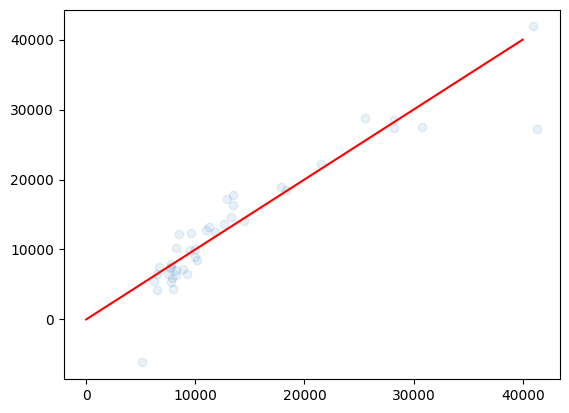

In [160]:
plt.scatter(y_test, y_pred, alpha=0.1)
(plt.plot([0, 40000], [0, 40000], 'r-'))

График демонстрирует положительную линейную зависимость между переменными. Линейная регрессия хорошо описывает основную часть данных, но есть несколько выбросов, которые могут влиять на точность модели

#### Квадратичная регрессия 

In [161]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

X_test_poly = poly.transform(X_test)
y_pred_poly = model_poly.predict(X_test_poly)
new_df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred_poly}) 
print(new_df.head())

        Actual      Predicted
15   30760.000   16718.965632
9    17859.167  293671.197127
100   9549.000    7471.908381
132  11850.000   11259.162408
68   28248.000  -94360.338280


Почему-то для некоторых случаев модель предсказала отрицательные значения

In [162]:
y_pred_poly

array([  16718.96563242,  293671.19712725,    7471.90838109,
         11259.16240829,  -94360.33827977,   12042.20416758,
        -88766.28152397,   19443.67791568,    3443.14771521,
        -19543.12927355,  -60658.56162626,    7342.92602709,
        -59731.06402535,    -809.51669093,  431001.75511432,
         16140.77462747, -353474.86951853,   17920.5056116 ,
         10634.90539471,   18594.3355157 ,    8363.06288758,
        -86436.5914814 ,  124688.37021181, -241483.67961404,
          6865.85752159,  157091.57386664,    7671.58903983,
         13399.69110902,    7046.97744627,    9423.51898669,
        -85738.18479255,   20625.40073345,   16270.11961577,
       -236985.80056846,   35376.42603869, -219073.4651829 ,
         86716.97877703,    9886.22109854,    7498.38981643,
         15761.91974781,   -9176.63086925])

In [163]:
y_pred_poly = np.maximum(y_pred_poly, 0)
y_pred_poly

array([ 16718.96563242, 293671.19712725,   7471.90838109,  11259.16240829,
            0.        ,  12042.20416758,      0.        ,  19443.67791568,
         3443.14771521,      0.        ,      0.        ,   7342.92602709,
            0.        ,      0.        , 431001.75511432,  16140.77462747,
            0.        ,  17920.5056116 ,  10634.90539471,  18594.3355157 ,
         8363.06288758,      0.        , 124688.37021181,      0.        ,
         6865.85752159, 157091.57386664,   7671.58903983,  13399.69110902,
         7046.97744627,   9423.51898669,      0.        ,  20625.40073345,
        16270.11961577,      0.        ,  35376.42603869,      0.        ,
        86716.97877703,   9886.22109854,   7498.38981643,  15761.91974781,
            0.        ])

In [164]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mae

2141.797402171684

In [165]:
mae_poly

31523.94571801525

MAE получилась намного хуже, чем при вычислении линейной регрессии. Следовательно, в данном случае лучше использовать модель линейной регрессии

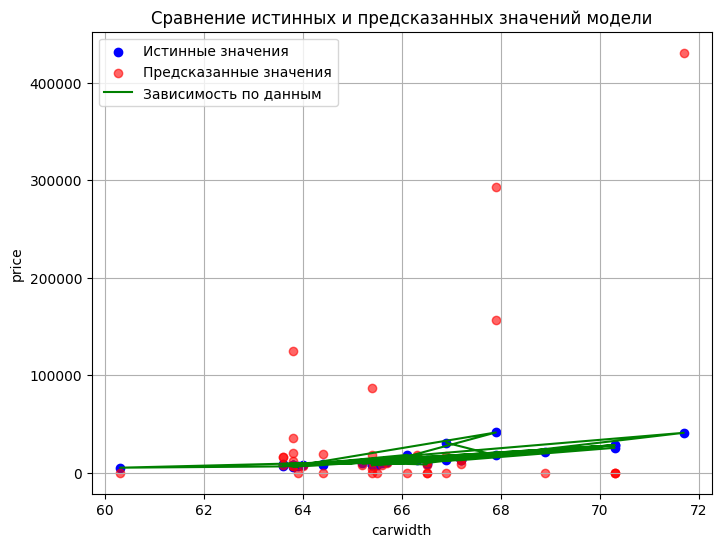

In [166]:
X_test_single_feature = X_test['carwidth'] 

plt.figure(figsize=(8, 6))
plt.scatter(X_test_single_feature, y_test, color='blue', label='Истинные значения')
plt.scatter(X_test_single_feature, y_pred_poly, color='red', label='Предсказанные значения', alpha=0.6)
plt.plot(X_test_single_feature, y_test, color='green', label='Зависимость по данным')
plt.title('Сравнение истинных и предсказанных значений модели')
plt.xlabel('carwidth')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()


В целом, можно сделать вывод, что в диапозоне от 64 до 68, предсказания относительно точные. Однако дальше 68 предсказания значительно хуже. Это указывает на возрастание неопределенности модели для более широких автомобилей 

#### Модели линейного и квадратичного тренда

Поскольку в модели отсутствуют временные данные, использование моделей линейного и квадратичного тренда не имеет смысла

## Часть 2. Разработать прогностическую модель для набора данных диабетических обследований diabetes.txt. Использовать логистическую регрессию,  и метод максимального правдоподобия. Коэффициенты логистической регрессии найти с помощью метода градиентного спуска, который необходимо запрограммировать вручную. Разбить выборку на обучающую и тестовую. Вычислить точность классификации. 
### Применить отбор признаков на основе корреляции: выбрать наилучшее признаковое пространство, имеющее на два измерения меньше исходного. Построить новую модель и вычислить точность классификации.

In [167]:
path = 'diabetes.xlsx'
data = pd.read_excel(path, index_col=0)
data.head()

,Глюкоза,АД,Толщина КС,Инсулин,ИМТ,Наследственность,Возраст,Диагноз
Беременность,,,,,,,,
6,148,72,35.0,0.0,33.6,0.627,50,1
1,85,66,29.0,0.0,26.6,0.351,31,0
8,183,64,0.0,0.0,23.3,0.672,32,1
1,89,66,23.0,94.0,28.1,0.167,21,0
0,137,40,35.0,168.0,43.1,2.288,33,1


### Для начала проведем предварительный разведочный анализ набора данных, в ходе которого рассмотрим ключевые характеристеки набора:

In [168]:
data.columns

Index(['Глюкоза', 'АД', 'Толщина КС', 'Инсулин', 'ИМТ', 'Наследственность',
       'Возраст', 'Диагноз'],
      dtype='object')

In [169]:
data.shape

(768, 8)

In [170]:
data.dtypes

Глюкоза               int64
АД                    int64
Толщина КС          float64
Инсулин             float64
ИМТ                 float64
Наследственность     object
Возраст               int64
Диагноз               int64
dtype: object

Почему-то слолбец наследственность интерпретируется программой как объект. Рассмотрим его подробнее

In [171]:
data['Наследственность'].unique()

array(['0.627', '0.351', '0.672', '0.167', '2.288', '0.201', '0.248',
       '0.134', '0.158', '0.232', '0.191', '0.537', '1.441', '0.398',
       '0.587', '0.484', '0.551', '0.254', '0.183', '0.529', '0.704',
       '0.388', '0.451', '0.263', '0.205', '0.257', '0.487', '0.245',
       '0.337', '0.546', '0.851', '0.267', '0.188', '0.512', '0.966',
       '0.42', '0.665', '0.503', datetime.datetime(1939, 1, 1, 0, 0),
       '0.271', '0.696', '0.235', '0.721', '0.294', '1.893', '0.564',
       '0.586', '0.344', '0.305', '0.491', '0.526', '0.342', '0.467',
       '0.718', '0.962', '1.781', '0.173', '0.304', '0.27', '0.699',
       '0.258', '0.203', '0.855', '0.845', '0.334', '0.189', '0.867',
       '0.411', '0.583', '0.231', '0.396', '0.14', '0.391', '0.37',
       '0.307', '0.102', '0.767', '0.237', '0.227', '0.698', '0.178',
       '0.324', '0.153', '0.165', '0.443', '0.261', '0.277', '0.761',
       '0.255', '0.13', '0.323', '0.356', '0.325', '1.222', '0.179',
       '0.262', '0.283',

In [172]:
import datetime
is_datetime = data['Наследственность'].apply(lambda x: isinstance(x, datetime.datetime))
print(data[is_datetime])


              Глюкоза  АД  Толщина КС  Инсулин   ИМТ     Наследственность   
Беременность                                                                
4                 111  72        47.0    207.0  37.1  1939-01-01 00:00:00  \
2                 106  64        35.0    119.0  30.5  2023-04-01 00:00:00   
2                 127  58        24.0    275.0  27.7  2023-06-01 00:00:00   
0                 180  78        63.0     14.0  59.4  1942-02-01 00:00:00   

              Возраст  Диагноз  
Беременность                    
4                  56        1  
2                  34        0  
2                  25        0  
0                  25        1  


In [173]:
data['Наследственность'] = pd.to_numeric(data['Наследственность'], errors='coerce')
print(data['Наследственность'].unique())

[0.627 0.351 0.672 0.167 2.288 0.201 0.248 0.134 0.158 0.232 0.191 0.537
 1.441 0.398 0.587 0.484 0.551 0.254 0.183 0.529 0.704 0.388 0.451 0.263
 0.205 0.257 0.487 0.245 0.337 0.546 0.851 0.267 0.188 0.512 0.966 0.42
 0.665 0.503   nan 0.271 0.696 0.235 0.721 0.294 1.893 0.564 0.586 0.344
 0.305 0.491 0.526 0.342 0.467 0.718 0.962 1.781 0.173 0.304 0.27  0.699
 0.258 0.203 0.855 0.845 0.334 0.189 0.867 0.411 0.583 0.231 0.396 0.14
 0.391 0.37  0.307 0.102 0.767 0.237 0.227 0.698 0.178 0.324 0.153 0.165
 0.443 0.261 0.277 0.761 0.255 0.13  0.323 0.356 0.325 1.222 0.179 0.262
 0.283 0.93  0.801 0.207 0.287 0.336 0.247 0.199 0.543 0.192 0.588 0.539
 0.22  0.654 0.223 0.759 0.26  0.404 0.186 0.278 0.496 0.452 0.403 0.741
 0.361 1.114 0.457 0.647 0.088 0.597 0.532 0.703 0.159 0.268 0.286 0.318
 0.272 0.572 0.096 0.218 0.085 0.399 0.432 1.189 0.687 0.137 0.637 0.833
 0.229 0.817 0.204 0.368 0.743 0.722 0.256 0.709 0.471 0.495 0.18  0.542
 0.773 0.678 0.719 0.382 0.319 0.19  0.956 0.084 0.72

In [174]:
data.isna().sum()

Глюкоза             0
АД                  0
Толщина КС          0
Инсулин             0
ИМТ                 0
Наследственность    4
Возраст             0
Диагноз             0
dtype: int64

In [175]:
data = data.dropna(subset=['Наследственность'])

In [176]:
data.isna().sum()

Глюкоза             0
АД                  0
Толщина КС          0
Инсулин             0
ИМТ                 0
Наследственность    0
Возраст             0
Диагноз             0
dtype: int64

### Логистическая регрессия

формула сигмоиды:
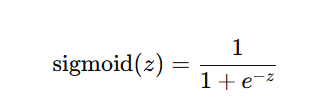

z — это линейная комбинация признаков:
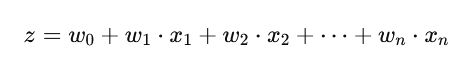

Градиент для весов вычисляется как:
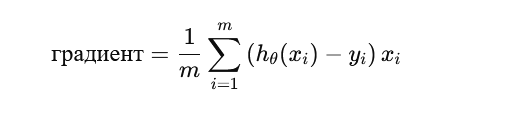
Градиент показывает, насколько сильно меняется ошибка предсказания (разница между предсказанной вероятностью и истинной меткой) в зависимости от изменения конкретного признака. Градиент показывает напрвление, он может быть как положительным, так и отрицательным. Положительный градиент показывает как функция растет, а вектор градиента показывает насколько склон крутой. Почему он может быть отрицательным? Градиент — это "склон" функции. Он говорит, как "наклонена" функция в данной точке:
1) Если "склон вверх", то градиент положительный. Если градиент положительный → значит, функция потерь идет верх, ошибка растёт, если увеличить вес. Поэтому мы уменьшаем вес.
2) Если "склон вниз", то градиент отрицательный. Если градиент отрицательный → значит, ошибка уменьшается, если увеличивать вес. Поэтому мы увеличиваем вес.


Градиент вычисляется из функции потерь. Он точно рассчитывает, как функция ошибки будет изменяться, если вес изменится. Это происходит благодаря математике, а именно — производным 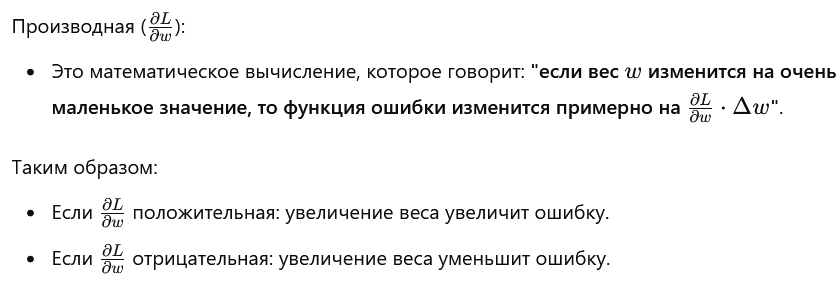

In [177]:
# Логистическая функция (сигмоида) - 
# принимает любое число (положительное или отрицательное) и преобразует его в число от 0 до 1.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

"""
Функция для расчета градиентного спуска 
метод оптимизации, который помогает найти лучшие значения весов для модели, которые 
минимизируют разницу между предсказанными значениями и реальными метками (истинные значения)
"""
def gradient_descent(X, y, lr=0.01, iterations=1000):
    m, n = X.shape # m - кол-во строк, n - кол-во столбцов
    weights = np.zeros(n) # изначально все веса нули 
    for i in range(iterations):
        z = np.dot(X, weights) # вычисление линейной комбинации признаков и весов для каждого объекта
        h = sigmoid(z) # сигмоида для каждого объекта, чтобы получить вероятность принадлежности к классу 1 (положительный класс).
        gradient = np.dot(X.T, (h - y)) / m 
        """
        (h - y) - это ошибка модели для каждого объекта (сравниваем предсказанное и истинное)
        np.dot(X.T, (h - y)) — это градиент (направление, в котором веса должны измениться, чтобы уменьшить ошибку)
        Он показывает, насколько сильно и в каком направлении нужно обновить каждый вес
        делим на m, чтобы нормализовать градиент по количеству объектов
        """
        weights -= lr * gradient 
        # вычитаем градиент, умноженный на скорость обучения, чтобы обновить веса. Это помогает модели постепенно улучшаться и снижать ошибку
    return weights # Чем больше вес, тем больше влияние признака на результат

Градиентный спуск минимизирует функцию потерь, которая в логистической регрессии тесно связана с отрицательной логарифмической функцией правдоподобия. То есть, градиентный спуск минимизирует отрицательное правдоподобие — это эквивалентно максимизации функции правдоподобия

Функция gradient_descent минимизирует сумму квадратов отклонений между предсказанными значениями и истинными метками (через функцию ошибки, основанную на логистической регрессии). Следовательно минимизируется отрицательное правдоподобие. Этот процесс напрямую связан с методом максимального правдоподобия

In [178]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Применение градиентного спуска - функция обучает модель и ищет оптимальные веса для каждого признака
weights = gradient_descent(X_train, y_train) 

In [179]:

def predict(X, weights):
    return [1 if i >= 0.5 else 0 for i in sigmoid(np.dot(X, weights))]

Accuracy в машинном обучении — это доля правильных ответов модели среди всех предсказаний. Чем выше точность, тем лучше

accuracy находится по формуле:
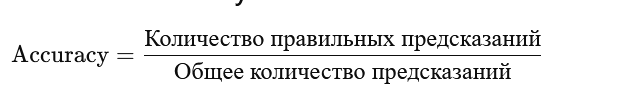

In [180]:
new_df = pd.DataFrame({"имя признака": data.columns[:-1], "вес": weights})
new_df

,имя признака,вес
0,Глюкоза,-0.051537
1,АД,-1.020892
2,Толщина КС,-0.181979
3,Инсулин,-0.294106
4,ИМТ,0.425620
5,Наследственность,0.070735
6,Возраст,0.201156


In [181]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, weights)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность классификации: {accuracy}")


Точность классификации: 0.7058823529411765


Получается, модель правильно сделала 71 процент предсказаний

### Отбор признаков на основе корреляции

In [182]:
correlations = data.corr()['Диагноз'].sort_values(ascending=False)
print(correlations)

Диагноз             1.000000
Глюкоза             0.466181
ИМТ                 0.287965
Возраст             0.237023
Наследственность    0.171947
Инсулин             0.132340
Толщина КС          0.068821
АД                  0.063411
Name: Диагноз, dtype: float64


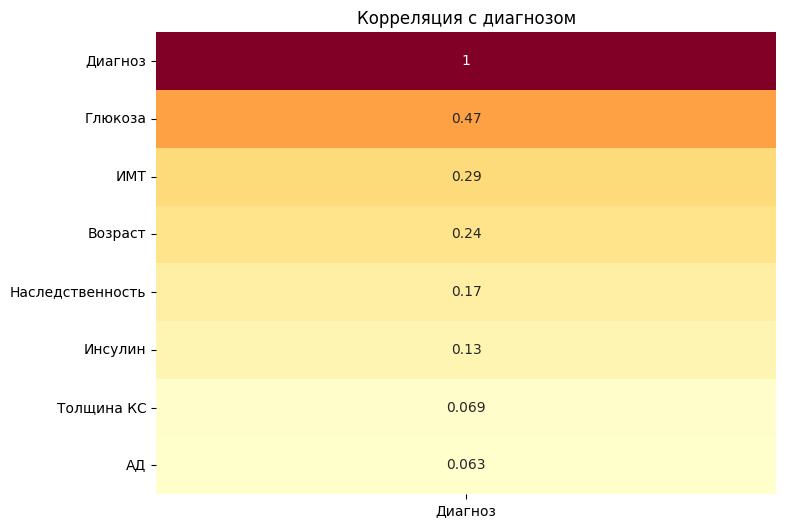

In [183]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(correlations.to_frame(), annot=True, cmap='YlOrRd', cbar=False)
plt.title('Корреляция с диагнозом')
plt.show()

Для выбора наилучшего признакового пространства, имеющего на два измерения меньше исходного, уменьшим количество признаков на 2. Самые худшие признаки - АД и Толщина КС, они имеют самую маленькую корреляцию с диагнозом. Значит необходимо их удалить

In [184]:
top_features = correlations.index[1:-2]

In [185]:
top_features

Index(['Глюкоза', 'ИМТ', 'Возраст', 'Наследственность', 'Инсулин'], dtype='object')

In [186]:
# Обновляем данные
X_top = data[top_features].values
# Нормализация новых признаков
X_top = (X_top - np.mean(X_top, axis=0)) / np.std(X_top, axis=0)

# Обучение модели с новыми признаками
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)
weights_top = gradient_descent(X_train_top, y_train)

# Предсказания и вычисление точности
y_pred_top = predict(X_test_top, weights_top)
accuracy_top = accuracy_score(y_test, y_pred_top)
print(f"Точность классификации с новыми признаками: {accuracy_top}")

Точность классификации с новыми признаками: 0.7189542483660131


Видно, что модель стала чуть-чуть (на 1 процент) лучше после выбора наилучшего признакового пространства, однако это незначительно. Это может быть связано с тем, что данные, которые мы удалили, имели малое влияние на модель, так как корреляция была очень маленькая